In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [32]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train_df = pd.read_csv(Path('./Resources/2019loans.csv'))
test_df = pd.read_csv(Path('./Resources/2020Q1loans.csv'))

In [4]:
train_df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,n,28.42,0.0,0.0,...,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N,high_risk
12176,15000.0,0.1774,540.34,RENT,50000.0,Verified,n,23.43,4.0,0.0,...,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N,high_risk
12177,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,n,28.80,0.0,1.0,...,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N,high_risk
12178,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,n,11.44,0.0,0.0,...,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N,high_risk


In [5]:
test_df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,RENT,140480.0,Source Verified,n,15.74,0.0,0.0,...,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0,N,N,high_risk
4698,24000.0,0.0756,747.22,RENT,50000.0,Not Verified,n,26.81,0.0,0.0,...,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0,N,N,high_risk
4699,10000.0,0.2305,387.36,RENT,33000.0,Verified,n,38.51,0.0,2.0,...,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0,N,N,high_risk
4700,8000.0,0.1862,205.86,RENT,38000.0,Source Verified,n,16.36,0.0,1.0,...,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0,N,N,high_risk


In [15]:
# Convert categorical data to numeric and separate target feature for training data
X_1 = train_df.drop('target', axis=1)
X_dummies_train = pd.get_dummies(X_1)
print(X_dummies_train.columns)
X_dummies_train

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,0,1,1,0,1,0,1,0,1,0
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,0,1,0,1,1,0,1,0,1,0
2,11000.0,0.2055,294.81,45000.0,37.25,1.0,3.0,23.0,0.0,8242.0,...,1,1,0,1,1,0,1,0,1,0
3,4000.0,0.1612,140.87,38000.0,42.89,1.0,0.0,7.0,0.0,12767.0,...,0,1,0,1,0,1,1,0,1,0
4,14000.0,0.1797,505.93,43000.0,22.16,1.0,0.0,22.0,0.0,11182.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,0,1,0,1,1,0,1,0,1,0
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,1,1,0,1,1,0,1,0,1,0
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,0,1,0,1,1,0,1,0,1,0
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,0,1,0,1,0,1,1,0,1,0


In [13]:
from sklearn.preprocessing import LabelEncoder
y_label_1 = LabelEncoder().fit_transform(train_df['target'])
y_label_1

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
# Convert categorical data to numeric and separate target feature for testing data
X_2 = test_df.drop('target', axis=1)
X_dummies_test = pd.get_dummies(X_2)
print(X_dummies_test.columns)
X_dummies_test

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,1,0,1,0,1,1,0,0,1,1
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,0,1,0,1,1,0,1,0,1
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,0,1,0,1,1,0,0,1,1
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,0,1,1,0,1,1,0,1,0,1
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,1,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,1,0,1,1,0,1,0,1,0,1
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,0,1,0,1,1,0,1,0,1
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,0,1,1,1,0,1,0,1,0,1
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,1,0,1,0,1,1,0,1,0,1


In [14]:
from sklearn.preprocessing import LabelEncoder
y_label_2 = LabelEncoder().fit_transform(test_df['target'])
y_label_2

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
# add missing dummy variables to testing set
X_dummies_test["debt_settlement_flag_Y"] = X_dummies_test["debt_settlement_flag_N"].apply(lambda x: 1 if x == 0 else 0)
X_dummies_test

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,0,1,0,1,1,0,0,1,1,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,1,0,1,1,0,1,0,1,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,1,0,1,1,0,0,1,1,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,1,1,0,1,1,0,1,0,1,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,0,1,1,0,1,0,1,0,1,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,1,0,1,1,0,1,0,1,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,1,1,1,0,1,0,1,0,1,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,0,1,0,1,1,0,1,0,1,0


In [34]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier = LogisticRegression()
classifier.fit(X_dummies_train, y_label_1)

C:\Users\15303\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_dummies_train, y_label_1)
print(f'Training Score: {clf.score(X_dummies_train, y_label_1)}')
print(f'Testing Score: {clf.score(X_dummies_test, y_label_2)}')

Training Score: 1.0
Testing Score: 0.646958740961293


In [36]:
feature_importances = clf.feature_importances_

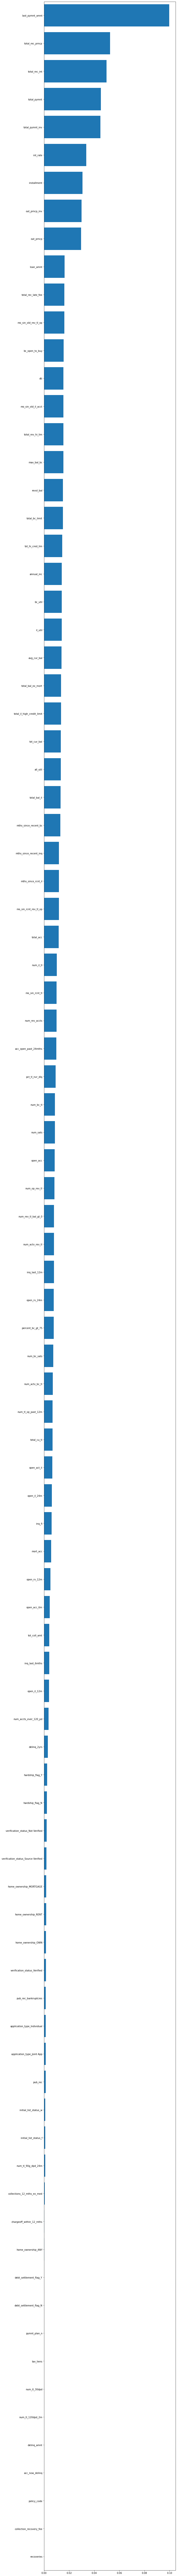

In [41]:
%matplotlib inline
features = sorted(zip(X_dummies_train.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [42]:
# Scale the data
scaler = StandardScaler().fit(X_dummies_train)
X_train_scaled = scaler.transform(X_dummies_train)
X_test_scaled = scaler.transform(X_dummies_test)

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score

In [43]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_label_1)
print(f'Training Score: {clf.score(X_train_scaled, y_label_1)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_label_2)}')

Training Score: 1.0
Testing Score: 0.6480221182475542
